## Practice problem - 1


In [350]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [351]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [352]:
# 데이터 입력
sy = pd.Series(cancer.target, dtype="float")
data_df['class'] = sy
data_df.fillna(0,inplace=True)
dataset = data_df.values
X = dataset[:,0:30]
Y = dataset[:,30]
print(sy)
data_df

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Length: 569, dtype: float64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [353]:
# 모델 설정
model = Sequential([
    Dense(30, input_dim=30, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
]) 
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_93 (Dense)             (None, 12)                372       
_________________________________________________________________
dense_94 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 9         
Total params: 1,415
Trainable params: 1,415
Non-trainable params: 0
_________________________________________________________________


In [354]:
# 모델 컴파일 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [355]:
# 모델 저장 폴더 설정
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [356]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "final{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [357]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [358]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=5000, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback])


Epoch 00001: val_loss improved from inf to 19.99243, saving model to ./model/final001-19.9924.hdf5

Epoch 00002: val_loss improved from 19.99243 to 14.80661, saving model to ./model/final002-14.8066.hdf5

Epoch 00003: val_loss improved from 14.80661 to 9.67203, saving model to ./model/final003-9.6720.hdf5

Epoch 00004: val_loss improved from 9.67203 to 4.99425, saving model to ./model/final004-4.9943.hdf5

Epoch 00005: val_loss improved from 4.99425 to 4.45457, saving model to ./model/final005-4.4546.hdf5

Epoch 00006: val_loss did not improve from 4.45457

Epoch 00007: val_loss did not improve from 4.45457

Epoch 00008: val_loss did not improve from 4.45457

Epoch 00009: val_loss did not improve from 4.45457

Epoch 00010: val_loss did not improve from 4.45457

Epoch 00011: val_loss did not improve from 4.45457

Epoch 00012: val_loss did not improve from 4.45457

Epoch 00013: val_loss did not improve from 4.45457

Epoch 00014: val_loss did not improve from 4.45457

Epoch 00015: val_lo

Epoch 00128: val_loss did not improve from 0.19040

Epoch 00129: val_loss did not improve from 0.19040

Epoch 00130: val_loss did not improve from 0.19040

Epoch 00131: val_loss did not improve from 0.19040

Epoch 00132: val_loss did not improve from 0.19040

Epoch 00133: val_loss did not improve from 0.19040

Epoch 00134: val_loss did not improve from 0.19040

Epoch 00135: val_loss did not improve from 0.19040

Epoch 00136: val_loss did not improve from 0.19040

Epoch 00137: val_loss did not improve from 0.19040

Epoch 00138: val_loss did not improve from 0.19040

Epoch 00139: val_loss did not improve from 0.19040

Epoch 00140: val_loss did not improve from 0.19040

Epoch 00141: val_loss did not improve from 0.19040

Epoch 00142: val_loss did not improve from 0.19040

Epoch 00143: val_loss did not improve from 0.19040

Epoch 00144: val_loss did not improve from 0.19040

Epoch 00145: val_loss did not improve from 0.19040

Epoch 00146: val_loss did not improve from 0.19040

Epoch 00147:


Epoch 00251: val_loss improved from 0.18547 to 0.18544, saving model to ./model/final251-0.1854.hdf5

Epoch 00252: val_loss improved from 0.18544 to 0.18541, saving model to ./model/final252-0.1854.hdf5

Epoch 00253: val_loss improved from 0.18541 to 0.18537, saving model to ./model/final253-0.1854.hdf5

Epoch 00254: val_loss improved from 0.18537 to 0.18533, saving model to ./model/final254-0.1853.hdf5

Epoch 00255: val_loss improved from 0.18533 to 0.18529, saving model to ./model/final255-0.1853.hdf5

Epoch 00256: val_loss improved from 0.18529 to 0.18525, saving model to ./model/final256-0.1853.hdf5

Epoch 00257: val_loss improved from 0.18525 to 0.18522, saving model to ./model/final257-0.1852.hdf5

Epoch 00258: val_loss improved from 0.18522 to 0.18520, saving model to ./model/final258-0.1852.hdf5

Epoch 00259: val_loss improved from 0.18520 to 0.18517, saving model to ./model/final259-0.1852.hdf5

Epoch 00260: val_loss improved from 0.18517 to 0.18514, saving model to ./model/f


Epoch 00342: val_loss improved from 0.18032 to 0.18025, saving model to ./model/final342-0.1803.hdf5

Epoch 00343: val_loss improved from 0.18025 to 0.18020, saving model to ./model/final343-0.1802.hdf5

Epoch 00344: val_loss improved from 0.18020 to 0.18016, saving model to ./model/final344-0.1802.hdf5

Epoch 00345: val_loss improved from 0.18016 to 0.18012, saving model to ./model/final345-0.1801.hdf5

Epoch 00346: val_loss improved from 0.18012 to 0.18009, saving model to ./model/final346-0.1801.hdf5

Epoch 00347: val_loss improved from 0.18009 to 0.18004, saving model to ./model/final347-0.1800.hdf5

Epoch 00348: val_loss improved from 0.18004 to 0.17999, saving model to ./model/final348-0.1800.hdf5

Epoch 00349: val_loss improved from 0.17999 to 0.17994, saving model to ./model/final349-0.1799.hdf5

Epoch 00350: val_loss improved from 0.17994 to 0.17988, saving model to ./model/final350-0.1799.hdf5

Epoch 00351: val_loss improved from 0.17988 to 0.17983, saving model to ./model/f


Epoch 00433: val_loss did not improve from 0.17674

Epoch 00434: val_loss did not improve from 0.17674

Epoch 00435: val_loss improved from 0.17674 to 0.17672, saving model to ./model/final435-0.1767.hdf5

Epoch 00436: val_loss improved from 0.17672 to 0.17665, saving model to ./model/final436-0.1767.hdf5

Epoch 00437: val_loss improved from 0.17665 to 0.17659, saving model to ./model/final437-0.1766.hdf5

Epoch 00438: val_loss improved from 0.17659 to 0.17653, saving model to ./model/final438-0.1765.hdf5

Epoch 00439: val_loss improved from 0.17653 to 0.17650, saving model to ./model/final439-0.1765.hdf5

Epoch 00440: val_loss improved from 0.17650 to 0.17649, saving model to ./model/final440-0.1765.hdf5

Epoch 00441: val_loss improved from 0.17649 to 0.17648, saving model to ./model/final441-0.1765.hdf5

Epoch 00442: val_loss did not improve from 0.17648

Epoch 00443: val_loss improved from 0.17648 to 0.17647, saving model to ./model/final443-0.1765.hdf5

Epoch 00444: val_loss impro


Epoch 00523: val_loss improved from 0.17366 to 0.17360, saving model to ./model/final523-0.1736.hdf5

Epoch 00524: val_loss improved from 0.17360 to 0.17354, saving model to ./model/final524-0.1735.hdf5

Epoch 00525: val_loss improved from 0.17354 to 0.17350, saving model to ./model/final525-0.1735.hdf5

Epoch 00526: val_loss improved from 0.17350 to 0.17348, saving model to ./model/final526-0.1735.hdf5

Epoch 00527: val_loss improved from 0.17348 to 0.17346, saving model to ./model/final527-0.1735.hdf5

Epoch 00528: val_loss improved from 0.17346 to 0.17342, saving model to ./model/final528-0.1734.hdf5

Epoch 00529: val_loss improved from 0.17342 to 0.17338, saving model to ./model/final529-0.1734.hdf5

Epoch 00530: val_loss improved from 0.17338 to 0.17336, saving model to ./model/final530-0.1734.hdf5

Epoch 00531: val_loss improved from 0.17336 to 0.17331, saving model to ./model/final531-0.1733.hdf5

Epoch 00532: val_loss improved from 0.17331 to 0.17326, saving model to ./model/f


Epoch 00614: val_loss improved from 0.16982 to 0.16977, saving model to ./model/final614-0.1698.hdf5

Epoch 00615: val_loss improved from 0.16977 to 0.16972, saving model to ./model/final615-0.1697.hdf5

Epoch 00616: val_loss improved from 0.16972 to 0.16968, saving model to ./model/final616-0.1697.hdf5

Epoch 00617: val_loss improved from 0.16968 to 0.16963, saving model to ./model/final617-0.1696.hdf5

Epoch 00618: val_loss improved from 0.16963 to 0.16959, saving model to ./model/final618-0.1696.hdf5

Epoch 00619: val_loss improved from 0.16959 to 0.16955, saving model to ./model/final619-0.1695.hdf5

Epoch 00620: val_loss improved from 0.16955 to 0.16950, saving model to ./model/final620-0.1695.hdf5

Epoch 00621: val_loss improved from 0.16950 to 0.16946, saving model to ./model/final621-0.1695.hdf5

Epoch 00622: val_loss improved from 0.16946 to 0.16941, saving model to ./model/final622-0.1694.hdf5

Epoch 00623: val_loss improved from 0.16941 to 0.16936, saving model to ./model/f


Epoch 00695: val_loss improved from 0.16577 to 0.16572, saving model to ./model/final695-0.1657.hdf5

Epoch 00696: val_loss improved from 0.16572 to 0.16567, saving model to ./model/final696-0.1657.hdf5

Epoch 00697: val_loss improved from 0.16567 to 0.16561, saving model to ./model/final697-0.1656.hdf5

Epoch 00698: val_loss improved from 0.16561 to 0.16556, saving model to ./model/final698-0.1656.hdf5

Epoch 00699: val_loss improved from 0.16556 to 0.16551, saving model to ./model/final699-0.1655.hdf5

Epoch 00700: val_loss improved from 0.16551 to 0.16545, saving model to ./model/final700-0.1654.hdf5

Epoch 00701: val_loss improved from 0.16545 to 0.16539, saving model to ./model/final701-0.1654.hdf5

Epoch 00702: val_loss improved from 0.16539 to 0.16534, saving model to ./model/final702-0.1653.hdf5

Epoch 00703: val_loss improved from 0.16534 to 0.16529, saving model to ./model/final703-0.1653.hdf5

Epoch 00704: val_loss improved from 0.16529 to 0.16524, saving model to ./model/f


Epoch 00785: val_loss improved from 0.16087 to 0.16081, saving model to ./model/final785-0.1608.hdf5

Epoch 00786: val_loss improved from 0.16081 to 0.16075, saving model to ./model/final786-0.1608.hdf5

Epoch 00787: val_loss improved from 0.16075 to 0.16069, saving model to ./model/final787-0.1607.hdf5

Epoch 00788: val_loss improved from 0.16069 to 0.16064, saving model to ./model/final788-0.1606.hdf5

Epoch 00789: val_loss improved from 0.16064 to 0.16059, saving model to ./model/final789-0.1606.hdf5

Epoch 00790: val_loss improved from 0.16059 to 0.16054, saving model to ./model/final790-0.1605.hdf5

Epoch 00791: val_loss improved from 0.16054 to 0.16048, saving model to ./model/final791-0.1605.hdf5

Epoch 00792: val_loss improved from 0.16048 to 0.16042, saving model to ./model/final792-0.1604.hdf5

Epoch 00793: val_loss improved from 0.16042 to 0.16037, saving model to ./model/final793-0.1604.hdf5

Epoch 00794: val_loss improved from 0.16037 to 0.16031, saving model to ./model/f


Epoch 00875: val_loss improved from 0.15576 to 0.15573, saving model to ./model/final875-0.1557.hdf5

Epoch 00876: val_loss improved from 0.15573 to 0.15570, saving model to ./model/final876-0.1557.hdf5

Epoch 00877: val_loss improved from 0.15570 to 0.15563, saving model to ./model/final877-0.1556.hdf5

Epoch 00878: val_loss improved from 0.15563 to 0.15554, saving model to ./model/final878-0.1555.hdf5

Epoch 00879: val_loss improved from 0.15554 to 0.15547, saving model to ./model/final879-0.1555.hdf5

Epoch 00880: val_loss improved from 0.15547 to 0.15543, saving model to ./model/final880-0.1554.hdf5

Epoch 00881: val_loss improved from 0.15543 to 0.15540, saving model to ./model/final881-0.1554.hdf5

Epoch 00882: val_loss improved from 0.15540 to 0.15536, saving model to ./model/final882-0.1554.hdf5

Epoch 00883: val_loss improved from 0.15536 to 0.15529, saving model to ./model/final883-0.1553.hdf5

Epoch 00884: val_loss improved from 0.15529 to 0.15522, saving model to ./model/f


Epoch 00966: val_loss improved from 0.14971 to 0.14967, saving model to ./model/final966-0.1497.hdf5

Epoch 00967: val_loss improved from 0.14967 to 0.14958, saving model to ./model/final967-0.1496.hdf5

Epoch 00968: val_loss improved from 0.14958 to 0.14946, saving model to ./model/final968-0.1495.hdf5

Epoch 00969: val_loss improved from 0.14946 to 0.14936, saving model to ./model/final969-0.1494.hdf5

Epoch 00970: val_loss improved from 0.14936 to 0.14930, saving model to ./model/final970-0.1493.hdf5

Epoch 00971: val_loss improved from 0.14930 to 0.14926, saving model to ./model/final971-0.1493.hdf5

Epoch 00972: val_loss improved from 0.14926 to 0.14919, saving model to ./model/final972-0.1492.hdf5

Epoch 00973: val_loss improved from 0.14919 to 0.14909, saving model to ./model/final973-0.1491.hdf5

Epoch 00974: val_loss improved from 0.14909 to 0.14897, saving model to ./model/final974-0.1490.hdf5

Epoch 00975: val_loss improved from 0.14897 to 0.14888, saving model to ./model/f


Epoch 01054: val_loss improved from 0.14283 to 0.14276, saving model to ./model/final1054-0.1428.hdf5

Epoch 01055: val_loss improved from 0.14276 to 0.14270, saving model to ./model/final1055-0.1427.hdf5

Epoch 01056: val_loss improved from 0.14270 to 0.14263, saving model to ./model/final1056-0.1426.hdf5

Epoch 01057: val_loss improved from 0.14263 to 0.14256, saving model to ./model/final1057-0.1426.hdf5

Epoch 01058: val_loss improved from 0.14256 to 0.14249, saving model to ./model/final1058-0.1425.hdf5

Epoch 01059: val_loss improved from 0.14249 to 0.14242, saving model to ./model/final1059-0.1424.hdf5

Epoch 01060: val_loss improved from 0.14242 to 0.14235, saving model to ./model/final1060-0.1424.hdf5

Epoch 01061: val_loss improved from 0.14235 to 0.14229, saving model to ./model/final1061-0.1423.hdf5

Epoch 01062: val_loss improved from 0.14229 to 0.14222, saving model to ./model/final1062-0.1422.hdf5

Epoch 01063: val_loss improved from 0.14222 to 0.14215, saving model to 


Epoch 01157: val_loss improved from 0.13728 to 0.13718, saving model to ./model/final1157-0.1372.hdf5

Epoch 01158: val_loss improved from 0.13718 to 0.13708, saving model to ./model/final1158-0.1371.hdf5

Epoch 01159: val_loss improved from 0.13708 to 0.13699, saving model to ./model/final1159-0.1370.hdf5

Epoch 01160: val_loss improved from 0.13699 to 0.13690, saving model to ./model/final1160-0.1369.hdf5

Epoch 01161: val_loss improved from 0.13690 to 0.13682, saving model to ./model/final1161-0.1368.hdf5

Epoch 01162: val_loss improved from 0.13682 to 0.13675, saving model to ./model/final1162-0.1368.hdf5

Epoch 01163: val_loss improved from 0.13675 to 0.13668, saving model to ./model/final1163-0.1367.hdf5

Epoch 01164: val_loss improved from 0.13668 to 0.13661, saving model to ./model/final1164-0.1366.hdf5

Epoch 01165: val_loss improved from 0.13661 to 0.13655, saving model to ./model/final1165-0.1366.hdf5

Epoch 01166: val_loss improved from 0.13655 to 0.13650, saving model to 


Epoch 01239: val_loss improved from 0.13315 to 0.13309, saving model to ./model/final1239-0.1331.hdf5

Epoch 01240: val_loss improved from 0.13309 to 0.13304, saving model to ./model/final1240-0.1330.hdf5

Epoch 01241: val_loss improved from 0.13304 to 0.13300, saving model to ./model/final1241-0.1330.hdf5

Epoch 01242: val_loss improved from 0.13300 to 0.13295, saving model to ./model/final1242-0.1329.hdf5

Epoch 01243: val_loss improved from 0.13295 to 0.13290, saving model to ./model/final1243-0.1329.hdf5

Epoch 01244: val_loss improved from 0.13290 to 0.13285, saving model to ./model/final1244-0.1328.hdf5

Epoch 01245: val_loss improved from 0.13285 to 0.13280, saving model to ./model/final1245-0.1328.hdf5

Epoch 01246: val_loss improved from 0.13280 to 0.13275, saving model to ./model/final1246-0.1327.hdf5

Epoch 01247: val_loss improved from 0.13275 to 0.13270, saving model to ./model/final1247-0.1327.hdf5

Epoch 01248: val_loss improved from 0.13270 to 0.13265, saving model to 


Epoch 01325: val_loss improved from 0.12903 to 0.12899, saving model to ./model/final1325-0.1290.hdf5

Epoch 01326: val_loss improved from 0.12899 to 0.12895, saving model to ./model/final1326-0.1290.hdf5

Epoch 01327: val_loss improved from 0.12895 to 0.12890, saving model to ./model/final1327-0.1289.hdf5

Epoch 01328: val_loss improved from 0.12890 to 0.12885, saving model to ./model/final1328-0.1289.hdf5

Epoch 01329: val_loss improved from 0.12885 to 0.12878, saving model to ./model/final1329-0.1288.hdf5

Epoch 01330: val_loss improved from 0.12878 to 0.12874, saving model to ./model/final1330-0.1287.hdf5

Epoch 01331: val_loss improved from 0.12874 to 0.12871, saving model to ./model/final1331-0.1287.hdf5

Epoch 01332: val_loss improved from 0.12871 to 0.12868, saving model to ./model/final1332-0.1287.hdf5

Epoch 01333: val_loss improved from 0.12868 to 0.12865, saving model to ./model/final1333-0.1286.hdf5

Epoch 01334: val_loss improved from 0.12865 to 0.12860, saving model to 


Epoch 01425: val_loss did not improve from 0.12483

Epoch 01426: val_loss did not improve from 0.12483

Epoch 01427: val_loss did not improve from 0.12483

Epoch 01428: val_loss improved from 0.12483 to 0.12470, saving model to ./model/final1428-0.1247.hdf5

Epoch 01429: val_loss improved from 0.12470 to 0.12464, saving model to ./model/final1429-0.1246.hdf5

Epoch 01430: val_loss did not improve from 0.12464

Epoch 01431: val_loss did not improve from 0.12464

Epoch 01432: val_loss improved from 0.12464 to 0.12464, saving model to ./model/final1432-0.1246.hdf5

Epoch 01433: val_loss improved from 0.12464 to 0.12451, saving model to ./model/final1433-0.1245.hdf5

Epoch 01434: val_loss did not improve from 0.12451

Epoch 01435: val_loss did not improve from 0.12451

Epoch 01436: val_loss did not improve from 0.12451

Epoch 01437: val_loss improved from 0.12451 to 0.12439, saving model to ./model/final1437-0.1244.hdf5

Epoch 01438: val_loss improved from 0.12439 to 0.12435, saving model


Epoch 01538: val_loss did not improve from 0.12120

Epoch 01539: val_loss did not improve from 0.12120

Epoch 01540: val_loss improved from 0.12120 to 0.12117, saving model to ./model/final1540-0.1212.hdf5

Epoch 01541: val_loss improved from 0.12117 to 0.12106, saving model to ./model/final1541-0.1211.hdf5

Epoch 01542: val_loss did not improve from 0.12106

Epoch 01543: val_loss did not improve from 0.12106

Epoch 01544: val_loss did not improve from 0.12106

Epoch 01545: val_loss improved from 0.12106 to 0.12096, saving model to ./model/final1545-0.1210.hdf5

Epoch 01546: val_loss did not improve from 0.12096

Epoch 01547: val_loss did not improve from 0.12096

Epoch 01548: val_loss improved from 0.12096 to 0.12095, saving model to ./model/final1548-0.1210.hdf5

Epoch 01549: val_loss improved from 0.12095 to 0.12090, saving model to ./model/final1549-0.1209.hdf5

Epoch 01550: val_loss improved from 0.12090 to 0.12089, saving model to ./model/final1550-0.1209.hdf5

Epoch 01551: val_

Epoch 01646: val_loss improved from 0.11852 to 0.11844, saving model to ./model/final1646-0.1184.hdf5

Epoch 01647: val_loss did not improve from 0.11844

Epoch 01648: val_loss did not improve from 0.11844

Epoch 01649: val_loss improved from 0.11844 to 0.11843, saving model to ./model/final1649-0.1184.hdf5

Epoch 01650: val_loss improved from 0.11843 to 0.11840, saving model to ./model/final1650-0.1184.hdf5

Epoch 01651: val_loss did not improve from 0.11840

Epoch 01652: val_loss did not improve from 0.11840

Epoch 01653: val_loss improved from 0.11840 to 0.11835, saving model to ./model/final1653-0.1183.hdf5

Epoch 01654: val_loss did not improve from 0.11835

Epoch 01655: val_loss improved from 0.11835 to 0.11833, saving model to ./model/final1655-0.1183.hdf5

Epoch 01656: val_loss improved from 0.11833 to 0.11828, saving model to ./model/final1656-0.1183.hdf5

Epoch 01657: val_loss improved from 0.11828 to 0.11826, saving model to ./model/final1657-0.1183.hdf5

Epoch 01658: val_lo


Epoch 01754: val_loss improved from 0.11633 to 0.11630, saving model to ./model/final1754-0.1163.hdf5

Epoch 01755: val_loss improved from 0.11630 to 0.11623, saving model to ./model/final1755-0.1162.hdf5

Epoch 01756: val_loss did not improve from 0.11623

Epoch 01757: val_loss did not improve from 0.11623

Epoch 01758: val_loss improved from 0.11623 to 0.11618, saving model to ./model/final1758-0.1162.hdf5

Epoch 01759: val_loss improved from 0.11618 to 0.11617, saving model to ./model/final1759-0.1162.hdf5

Epoch 01760: val_loss did not improve from 0.11617

Epoch 01761: val_loss did not improve from 0.11617

Epoch 01762: val_loss improved from 0.11617 to 0.11611, saving model to ./model/final1762-0.1161.hdf5

Epoch 01763: val_loss did not improve from 0.11611

Epoch 01764: val_loss did not improve from 0.11611

Epoch 01765: val_loss improved from 0.11611 to 0.11610, saving model to ./model/final1765-0.1161.hdf5

Epoch 01766: val_loss improved from 0.11610 to 0.11602, saving model 


Epoch 01866: val_loss did not improve from 0.11427

Epoch 01867: val_loss improved from 0.11427 to 0.11425, saving model to ./model/final1867-0.1142.hdf5

Epoch 01868: val_loss improved from 0.11425 to 0.11422, saving model to ./model/final1868-0.1142.hdf5

Epoch 01869: val_loss did not improve from 0.11422

Epoch 01870: val_loss did not improve from 0.11422

Epoch 01871: val_loss improved from 0.11422 to 0.11416, saving model to ./model/final1871-0.1142.hdf5

Epoch 01872: val_loss improved from 0.11416 to 0.11415, saving model to ./model/final1872-0.1142.hdf5

Epoch 01873: val_loss did not improve from 0.11415

Epoch 01874: val_loss improved from 0.11415 to 0.11415, saving model to ./model/final1874-0.1141.hdf5

Epoch 01875: val_loss improved from 0.11415 to 0.11409, saving model to ./model/final1875-0.1141.hdf5

Epoch 01876: val_loss did not improve from 0.11409

Epoch 01877: val_loss did not improve from 0.11409

Epoch 01878: val_loss improved from 0.11409 to 0.11404, saving model 


Epoch 01979: val_loss did not improve from 0.11259

Epoch 01980: val_loss did not improve from 0.11259

Epoch 01981: val_loss improved from 0.11259 to 0.11258, saving model to ./model/final1981-0.1126.hdf5

Epoch 01982: val_loss improved from 0.11258 to 0.11257, saving model to ./model/final1982-0.1126.hdf5

Epoch 01983: val_loss did not improve from 0.11257

Epoch 01984: val_loss improved from 0.11257 to 0.11257, saving model to ./model/final1984-0.1126.hdf5

Epoch 01985: val_loss improved from 0.11257 to 0.11250, saving model to ./model/final1985-0.1125.hdf5

Epoch 01986: val_loss did not improve from 0.11250

Epoch 01987: val_loss did not improve from 0.11250

Epoch 01988: val_loss improved from 0.11250 to 0.11248, saving model to ./model/final1988-0.1125.hdf5

Epoch 01989: val_loss improved from 0.11248 to 0.11247, saving model to ./model/final1989-0.1125.hdf5

Epoch 01990: val_loss did not improve from 0.11247

Epoch 01991: val_loss did not improve from 0.11247

Epoch 01992: val_


Epoch 02089: val_loss improved from 0.11121 to 0.11121, saving model to ./model/final2089-0.1112.hdf5

Epoch 02090: val_loss improved from 0.11121 to 0.11120, saving model to ./model/final2090-0.1112.hdf5

Epoch 02091: val_loss improved from 0.11120 to 0.11115, saving model to ./model/final2091-0.1112.hdf5

Epoch 02092: val_loss did not improve from 0.11115

Epoch 02093: val_loss improved from 0.11115 to 0.11114, saving model to ./model/final2093-0.1111.hdf5

Epoch 02094: val_loss improved from 0.11114 to 0.11113, saving model to ./model/final2094-0.1111.hdf5

Epoch 02095: val_loss did not improve from 0.11113

Epoch 02096: val_loss improved from 0.11113 to 0.11111, saving model to ./model/final2096-0.1111.hdf5

Epoch 02097: val_loss improved from 0.11111 to 0.11108, saving model to ./model/final2097-0.1111.hdf5

Epoch 02098: val_loss did not improve from 0.11108

Epoch 02099: val_loss improved from 0.11108 to 0.11108, saving model to ./model/final2099-0.1111.hdf5

Epoch 02100: val_lo


Epoch 02211: val_loss did not improve from 0.10966

Epoch 02212: val_loss did not improve from 0.10966

Epoch 02213: val_loss improved from 0.10966 to 0.10963, saving model to ./model/final2213-0.1096.hdf5

Epoch 02214: val_loss did not improve from 0.10963

Epoch 02215: val_loss did not improve from 0.10963

Epoch 02216: val_loss improved from 0.10963 to 0.10960, saving model to ./model/final2216-0.1096.hdf5

Epoch 02217: val_loss did not improve from 0.10960

Epoch 02218: val_loss improved from 0.10960 to 0.10959, saving model to ./model/final2218-0.1096.hdf5

Epoch 02219: val_loss did not improve from 0.10959

Epoch 02220: val_loss did not improve from 0.10959

Epoch 02221: val_loss improved from 0.10959 to 0.10956, saving model to ./model/final2221-0.1096.hdf5

Epoch 02222: val_loss did not improve from 0.10956

Epoch 02223: val_loss did not improve from 0.10956

Epoch 02224: val_loss improved from 0.10956 to 0.10954, saving model to ./model/final2224-0.1095.hdf5

Epoch 02225: val

Epoch 02326: val_loss improved from 0.10867 to 0.10866, saving model to ./model/final2326-0.1087.hdf5

Epoch 02327: val_loss did not improve from 0.10866

Epoch 02328: val_loss did not improve from 0.10866

Epoch 02329: val_loss improved from 0.10866 to 0.10864, saving model to ./model/final2329-0.1086.hdf5

Epoch 02330: val_loss did not improve from 0.10864

Epoch 02331: val_loss did not improve from 0.10864

Epoch 02332: val_loss improved from 0.10864 to 0.10864, saving model to ./model/final2332-0.1086.hdf5

Epoch 02333: val_loss did not improve from 0.10864

Epoch 02334: val_loss improved from 0.10864 to 0.10863, saving model to ./model/final2334-0.1086.hdf5

Epoch 02335: val_loss did not improve from 0.10863

Epoch 02336: val_loss did not improve from 0.10863

Epoch 02337: val_loss improved from 0.10863 to 0.10863, saving model to ./model/final2337-0.1086.hdf5

Epoch 02338: val_loss did not improve from 0.10863

Epoch 02339: val_loss did not improve from 0.10863

Epoch 02340: val_


Epoch 02451: val_loss did not improve from 0.10736

Epoch 02452: val_loss did not improve from 0.10736

Epoch 02453: val_loss did not improve from 0.10736

Epoch 02454: val_loss did not improve from 0.10736

Epoch 02455: val_loss improved from 0.10736 to 0.10732, saving model to ./model/final2455-0.1073.hdf5

Epoch 02456: val_loss did not improve from 0.10732

Epoch 02457: val_loss did not improve from 0.10732

Epoch 02458: val_loss did not improve from 0.10732

Epoch 02459: val_loss did not improve from 0.10732

Epoch 02460: val_loss did not improve from 0.10732

Epoch 02461: val_loss improved from 0.10732 to 0.10729, saving model to ./model/final2461-0.1073.hdf5

Epoch 02462: val_loss did not improve from 0.10729

Epoch 02463: val_loss did not improve from 0.10729

Epoch 02464: val_loss improved from 0.10729 to 0.10723, saving model to ./model/final2464-0.1072.hdf5

Epoch 02465: val_loss did not improve from 0.10723

Epoch 02466: val_loss improved from 0.10723 to 0.10717, saving mod


Epoch 02597: val_loss did not improve from 0.10586

Epoch 02598: val_loss did not improve from 0.10586

Epoch 02599: val_loss improved from 0.10586 to 0.10586, saving model to ./model/final2599-0.1059.hdf5

Epoch 02600: val_loss improved from 0.10586 to 0.10579, saving model to ./model/final2600-0.1058.hdf5

Epoch 02601: val_loss did not improve from 0.10579

Epoch 02602: val_loss did not improve from 0.10579

Epoch 02603: val_loss did not improve from 0.10579

Epoch 02604: val_loss improved from 0.10579 to 0.10579, saving model to ./model/final2604-0.1058.hdf5

Epoch 02605: val_loss improved from 0.10579 to 0.10578, saving model to ./model/final2605-0.1058.hdf5

Epoch 02606: val_loss did not improve from 0.10578

Epoch 02607: val_loss did not improve from 0.10578

Epoch 02608: val_loss did not improve from 0.10578

Epoch 02609: val_loss did not improve from 0.10578

Epoch 02610: val_loss improved from 0.10578 to 0.10577, saving model to ./model/final2610-0.1058.hdf5

Epoch 02611: val


Epoch 02752: val_loss did not improve from 0.08312

Epoch 02753: val_loss did not improve from 0.08312

Epoch 02754: val_loss did not improve from 0.08312

Epoch 02755: val_loss did not improve from 0.08312

Epoch 02756: val_loss did not improve from 0.08312

Epoch 02757: val_loss did not improve from 0.08312

Epoch 02758: val_loss did not improve from 0.08312

Epoch 02759: val_loss did not improve from 0.08312

Epoch 02760: val_loss did not improve from 0.08312

Epoch 02761: val_loss did not improve from 0.08312

Epoch 02762: val_loss did not improve from 0.08312

Epoch 02763: val_loss did not improve from 0.08312

Epoch 02764: val_loss did not improve from 0.08312

Epoch 02765: val_loss did not improve from 0.08312

Epoch 02766: val_loss did not improve from 0.08312

Epoch 02767: val_loss did not improve from 0.08312

Epoch 02768: val_loss did not improve from 0.08312

Epoch 02769: val_loss did not improve from 0.08312

Epoch 02770: val_loss did not improve from 0.08312

Epoch 02771

In [359]:
del model

In [360]:
from tensorflow.keras.models import load_model
model = load_model('model/final2692-0.0831.hdf5')

In [361]:
print("\n Accuracy: %.4f" % (model.evaluate(X, Y, verbose=2)[1]))

569/569 - 0s - loss: 0.0739 - accuracy: 0.9684

 Accuracy: 0.9684


In [362]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

In [363]:
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

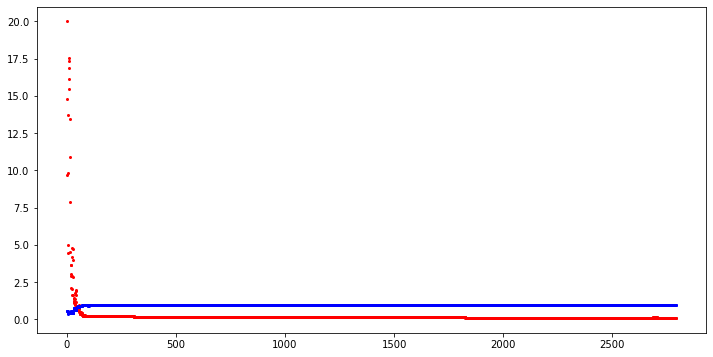

In [364]:
# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,6))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2)
plt.plot(x_len, y_acc, "o", c="blue", markersize=2)

plt.show()

 ### load-digit

In [379]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

data_df = pd.DataFrame(digits.data)
data_df

(1797, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [380]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [381]:
data_df['target'] = digits.target

In [382]:
data_df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [383]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [392]:
# 데이터 입력
dataset = data_df.values
X = dataset[:,0:63]
Y_tmp  = dataset[:,64]
Y_tmp 

array([0., 1., 2., ..., 8., 9., 8.])

In [391]:
data_df['target'].value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

In [397]:
# One-hot-encoding
from tensorflow.keras.utils import to_categorical
Y = to_categorical(Y_tmp, 10)
Y[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## 4개층의 경우

In [440]:
# 모델 설정
model2 = Sequential([
    Dense(40, input_dim=63, activation='relu'),
    Dense(24, activation='relu'),
    Dense(20, activation='relu'),
    Dense(12, activation='relu'),
    Dense(10, activation='softmax')
]) 
model2.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_134 (Dense)            (None, 40)                2560      
_________________________________________________________________
dense_135 (Dense)            (None, 24)                984       
_________________________________________________________________
dense_136 (Dense)            (None, 20)                500       
_________________________________________________________________
dense_137 (Dense)            (None, 12)                252       
_________________________________________________________________
dense_138 (Dense)            (None, 10)                130       
Total params: 4,426
Trainable params: 4,426
Non-trainable params: 0
_________________________________________________________________


In [441]:
# 모델 컴파일 
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [442]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "wcase2-{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback2 = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [443]:
# 모델 실행 및 저장
history2 = model2.fit(X, Y, validation_split=0.3, epochs=3500, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback2])


Epoch 00001: val_loss improved from inf to 2.78165, saving model to ./model/wcase2-001-2.7817.hdf5

Epoch 00002: val_loss improved from 2.78165 to 2.47313, saving model to ./model/wcase2-002-2.4731.hdf5

Epoch 00003: val_loss improved from 2.47313 to 2.31201, saving model to ./model/wcase2-003-2.3120.hdf5

Epoch 00004: val_loss improved from 2.31201 to 2.23200, saving model to ./model/wcase2-004-2.2320.hdf5

Epoch 00005: val_loss improved from 2.23200 to 2.17078, saving model to ./model/wcase2-005-2.1708.hdf5

Epoch 00006: val_loss improved from 2.17078 to 2.11623, saving model to ./model/wcase2-006-2.1162.hdf5

Epoch 00007: val_loss improved from 2.11623 to 2.07066, saving model to ./model/wcase2-007-2.0707.hdf5

Epoch 00008: val_loss improved from 2.07066 to 2.02616, saving model to ./model/wcase2-008-2.0262.hdf5

Epoch 00009: val_loss improved from 2.02616 to 1.98255, saving model to ./model/wcase2-009-1.9825.hdf5

Epoch 00010: val_loss improved from 1.98255 to 1.93820, saving mode


Epoch 00095: val_loss did not improve from 0.36350

Epoch 00096: val_loss did not improve from 0.36350

Epoch 00097: val_loss did not improve from 0.36350

Epoch 00098: val_loss did not improve from 0.36350

Epoch 00099: val_loss did not improve from 0.36350

Epoch 00100: val_loss did not improve from 0.36350

Epoch 00101: val_loss did not improve from 0.36350

Epoch 00102: val_loss did not improve from 0.36350

Epoch 00103: val_loss did not improve from 0.36350

Epoch 00104: val_loss improved from 0.36350 to 0.36221, saving model to ./model/wcase2-104-0.3622.hdf5

Epoch 00105: val_loss did not improve from 0.36221

Epoch 00106: val_loss did not improve from 0.36221

Epoch 00107: val_loss did not improve from 0.36221

Epoch 00108: val_loss did not improve from 0.36221

Epoch 00109: val_loss did not improve from 0.36221

Epoch 00110: val_loss did not improve from 0.36221

Epoch 00111: val_loss did not improve from 0.36221

Epoch 00112: val_loss did not improve from 0.36221

Epoch 00113

In [444]:
del model2
model2 = load_model('model/wcase2-104-0.3622.hdf5')
print("\n Accuracy: %.4f" % (model2.evaluate(X, Y, verbose=2)[1]))

1797/1797 - 0s - loss: 0.1230 - accuracy: 0.9727

 Accuracy: 0.9727


In [445]:
# 테스트셋
y_vloss = history2.history['val_loss']
y_vacc = history2.history['val_accuracy']
# 학습셋
y_loss = history2.history['loss']
y_acc = history2.history['accuracy']

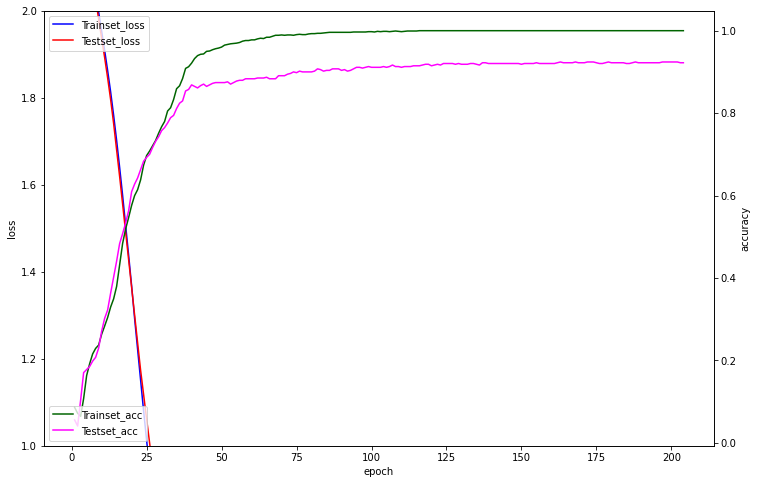

In [446]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(12,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylim([1,2])
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper left')
ax1.legend(loc='lower left')
plt.show()